In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Test_set.xlsx')

Business Requirement 
--
Supply and demand : relation between the availability of a particular product and the demand for that particular product has on its price.

Feature Details: 
    - Airline          : The name of the airline.   
    - Date_of_Journey  : The date of the journey  
    - Source           : The source from which the service begins.  
    - Destination      : The destination where the service ends. 
    - Route            : The route taken by the flight to reach the destination.   
    - Dep_Time         : The time when the journey starts from the source.  
    - Arrival_Time     : Time of arrival at the destination. 
    - Duration         : Total duration of the flight. 
    - Total_Stops      : Total stops between the source and destination.  
    - Additional_Info  : Additional information about the flight 
    - Price            : The price of the ticke

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


# Exploratory Data Analysis

## Data cleaning

#### One missing value in 'Total_Stops' --> drop that column

In [8]:
data = data.dropna()

### Date_of_Journey

#### split the date into year, month and day columns 

In [9]:
#train data

data['Journey_Date']  = data['Date_of_Journey'].str.split('/').str[0]
data['Journey_Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Journey_Year']  = data['Date_of_Journey'].str.split('/').str[2]

#test data

data_test['Journey_Date']  = data_test['Date_of_Journey'].str.split('/').str[0]
data_test['Journey_Month'] = data_test['Date_of_Journey'].str.split('/').str[1]
data_test['Journey_Year']  = data_test['Date_of_Journey'].str.split('/').str[2]

In [10]:
data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
data_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [11]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [12]:
data_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


 ### Route

#### using maximum no of stops we will split Route

In [13]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
## train data
data['Route_1'] = data['Route'].str.split('→ ').str[0]
data['Route_2'] = data['Route'].str.split('→ ').str[1]
data['Route_3'] = data['Route'].str.split('→ ').str[2]
data['Route_4'] = data['Route'].str.split('→ ').str[3]
data['Route_5'] = data['Route'].str.split('→ ').str[4]

data['Route_1'].fillna("None", inplace=True)
data['Route_2'].fillna("None", inplace=True)
data['Route_3'].fillna("None", inplace=True)
data['Route_4'].fillna("None", inplace=True)
data['Route_5'].fillna("None", inplace=True)

##test data
data_test['Route_1'] = data_test['Route'].str.split('→ ').str[0]
data_test['Route_2'] = data_test['Route'].str.split('→ ').str[1]
data_test['Route_3'] = data_test['Route'].str.split('→ ').str[2]
data_test['Route_4'] = data_test['Route'].str.split('→ ').str[3]
data_test['Route_5'] = data_test['Route'].str.split('→ ').str[4]

data_test['Route_1'].fillna("None", inplace=True)
data_test['Route_2'].fillna("None", inplace=True)
data_test['Route_3'].fillna("None", inplace=True)
data_test['Route_4'].fillna("None", inplace=True)
data_test['Route_5'].fillna("None", inplace=True)

In [15]:
data.drop(labels = 'Route', axis = 1, inplace = True)
data_test.drop(labels = 'Route', axis = 1, inplace = True)

In [16]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None


In [17]:
data_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,12,05,2019,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,05,2019,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,BLR,DEL,None,None,None


In [18]:
## the source and route are the same

In [19]:
data['Route_1'].value_counts()

DEL     4536
CCU     2871
BLR     2197
BOM      697
MAA      381
Name: Route_1, dtype: int64

In [20]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Dep_Time

In [21]:
## We will divide the Dep_time column to Dep_Hours and Dep_Minute

In [22]:
## train data
data['Dep_Hour']   = data['Dep_Time'].str.split(':').str[0]
data['Dep_Minute'] = data['Dep_Time'].str.split(':').str[1]

data['Dep_Hour']    = data['Dep_Hour'].astype(int)
data['Dep_Minute']  = data['Dep_Minute'].astype(int)

data.drop(labels = 'Dep_Time', axis = 1, inplace = True)

## test data
data_test['Dep_Hour']   = data_test['Dep_Time'].str.split(':').str[0]
data_test['Dep_Minute'] = data_test['Dep_Time'].str.split(':').str[1]

data_test['Dep_Hour']    = data_test['Dep_Hour'].astype(int)
data_test['Dep_Minute']  = data_test['Dep_Minute'].astype(int)

data_test.drop(labels = 'Dep_Time', axis = 1, inplace = True)

In [23]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50


In [24]:
data_test.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,DEL,BOM,COK,None,None,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,No info,12,05,2019,CCU,MAA,BLR,None,None,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,DEL,BOM,COK,None,None,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,No info,21,05,2019,DEL,BOM,COK,None,None,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,BLR,DEL,None,None,None,23,55


### Arrival_Time

In [25]:
# Split the Arrival_time to arrival_hours and arrival_min

In [26]:
#train data
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]

data['Arrival_Hour']   = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minute'] = data['Arrival_Time'].str.split(':').str[1]

data['Arrival_Hour']    = data['Arrival_Hour'].astype(int)
data['Arrival_Minute']  = data['Arrival_Minute'].astype(int)

data.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

#test data
data_test['Arrival_Time'] = data_test['Arrival_Time'].str.split(' ').str[0]

data_test['Arrival_Hour']   = data_test['Arrival_Time'].str.split(':').str[0]
data_test['Arrival_Minute'] = data_test['Arrival_Time'].str.split(':').str[1]

data_test['Arrival_Hour']    = data_test['Arrival_Hour'].astype(int)
data_test['Arrival_Minute']  = data_test['Arrival_Minute'].astype(int)

data_test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [27]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35


### Duration

In [28]:
duration = list(data['Duration'])

In [29]:
len(duration[2].split())

1

In [30]:
duration[2].strip() + ' 0m'

'19h 0m'

In [31]:
'0h {}'.format('20m'.strip())

'0h 20m'

In [32]:
duration = list(data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data['Duration_hours'] = dur_hours
data['Duration_minutes'] =dur_minutes

data['Duration_hours']    = data['Duration_hours'].astype(int)
data['Duration_minutes']  = data['Duration_minutes'].astype(int)

# test data
duration = list(data_test['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data_test['Duration_hours'] = dur_hours
data_test['Duration_minutes'] =dur_minutes

data_test['Duration_hours']    = data_test['Duration_hours'].astype(int)
data_test['Duration_minutes']  = data_test['Duration_minutes'].astype(int)

In [33]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,...,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,...,DEL,None,None,None,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,...,IXR,BBI,BLR,None,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,...,LKO,BOM,COK,None,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,...,NAG,BLR,None,None,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,...,NAG,DEL,None,None,16,50,21,35,4,45


In [34]:
data.drop(labels = 'Duration', axis = 1, inplace = True)
data_test.drop(labels = 'Duration', axis = 1, inplace = True)

In [35]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,4,45


In [36]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,06,2019,DEL,BOM,COK,None,None,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,05,2019,CCU,MAA,BLR,None,None,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,05,2019,DEL,BOM,COK,None,None,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,05,2019,DEL,BOM,COK,None,None,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,24,06,2019,BLR,DEL,None,None,None,23,55,2,45,2,50


### Total_Stops

In [37]:
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stop') 
data_test['Total_Stops'] = data_test['Total_Stops'].replace('non-stop', '0 stop') 

In [38]:
data['Total_Stops'].value_counts()

1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [39]:
data['Stops']    = data['Total_Stops'].str.split(' ').str[0]
data['Stops']    = data['Stops'].astype(int)
data.drop(labels = 'Total_Stops', axis = 1, inplace = True)

# test data
data_test['Stops']    = data_test['Total_Stops'].str.split(' ').str[0]
data_test['Stops']    = data_test['Stops'].astype(int)
data_test.drop(labels = 'Total_Stops', axis = 1, inplace = True)

In [40]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,4,45,1


## Data Preparation

### Label Encoding

In [41]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,4,45,1


In [42]:
data_test.head()

,Airline,Source,Destination,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,Jet Airways,Delhi,Cochin,No info,6,06,2019,DEL,BOM,COK,None,None,17,30,4,25,10,55,1
1,IndiGo,Kolkata,Banglore,No info,12,05,2019,CCU,MAA,BLR,None,None,6,20,10,20,4,0,1
2,Jet Airways,Delhi,Cochin,In-flight meal not included,21,05,2019,DEL,BOM,COK,None,None,19,15,19,0,23,45,1
3,Multiple carriers,Delhi,Cochin,No info,21,05,2019,DEL,BOM,COK,None,None,8,0,21,0,13,0,1
4,Air Asia,Banglore,Delhi,No info,24,06,2019,BLR,DEL,None,None,None,23,55,2,45,2,50,0


In [43]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 19 columns):
Airline             2671 non-null object
Source              2671 non-null object
Destination         2671 non-null object
Additional_Info     2671 non-null object
Journey_Date        2671 non-null object
Journey_Month       2671 non-null object
Journey_Year        2671 non-null object
Route_1             2671 non-null object
Route_2             2671 non-null object
Route_3             2671 non-null object
Route_4             2671 non-null object
Route_5             2671 non-null object
Dep_Hour            2671 non-null int32
Dep_Minute          2671 non-null int32
Arrival_Hour        2671 non-null int32
Arrival_Minute      2671 non-null int32
Duration_hours      2671 non-null int32
Duration_minutes    2671 non-null int32
Stops               2671 non-null int32
dtypes: int32(7), object(12)
memory usage: 323.5+ KB


#### Label encode - Airline, Source, Destination, Additional_Info, Route_1,...5

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_en = LabelEncoder() 

In [46]:
data.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Price                int64
Journey_Date        object
Journey_Month       object
Journey_Year        object
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Dep_Hour             int32
Dep_Minute           int32
Arrival_Hour         int32
Arrival_Minute       int32
Duration_hours       int32
Duration_minutes     int32
Stops                int32
dtype: object

In [47]:
data_test.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Journey_Date        object
Journey_Month       object
Journey_Year        object
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Dep_Hour             int32
Dep_Minute           int32
Arrival_Hour         int32
Arrival_Minute       int32
Duration_hours       int32
Duration_minutes     int32
Stops                int32
dtype: object

In [48]:
data['Airline']         = label_en.fit_transform(data['Airline'])
data['Source']          = label_en.fit_transform(data['Source'])
data['Destination']     = label_en.fit_transform(data['Destination'])
data['Additional_Info'] = label_en.fit_transform(data['Additional_Info'])
data['Route_1'] = label_en.fit_transform(data['Route_1'])
data['Route_2'] = label_en.fit_transform(data['Route_2'])
data['Route_3'] = label_en.fit_transform(data['Route_3'])
data['Route_4'] = label_en.fit_transform(data['Route_4'])
data['Route_5'] = label_en.fit_transform(data['Route_5'])

# test data
data_test['Airline']         = label_en.fit_transform(data_test['Airline'])
data_test['Source']          = label_en.fit_transform(data_test['Source'])
data_test['Destination']     = label_en.fit_transform(data_test['Destination'])
data_test['Additional_Info'] = label_en.fit_transform(data_test['Additional_Info'])
data_test['Route_1'] = label_en.fit_transform(data_test['Route_1'])
data_test['Route_2'] = label_en.fit_transform(data_test['Route_2'])
data_test['Route_3'] = label_en.fit_transform(data_test['Route_3'])
data_test['Route_4'] = label_en.fit_transform(data_test['Route_4'])
data_test['Route_5'] = label_en.fit_transform(data_test['Route_5'])

In [49]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,3,0,5,8,3897,24,03,2019,0,13,24,12,4,22,20,1,10,2,50,0
1,1,3,0,8,7662,1,05,2019,2,25,1,3,4,5,50,13,15,7,25,2
2,4,2,1,8,13882,9,06,2019,3,32,4,5,4,9,25,4,25,19,0,2
3,3,3,0,8,6218,12,05,2019,2,34,3,12,4,18,5,23,30,5,25,1
4,3,0,5,8,13302,01,03,2019,0,34,8,12,4,16,50,21,35,4,45,1


In [50]:
data_test.head()

,Airline,Source,Destination,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,4,2,1,5,6,06,2019,3,7,5,8,3,17,30,4,25,10,55,1
1,3,3,0,5,12,05,2019,2,29,3,8,3,6,20,10,20,4,0,1
2,4,2,1,3,21,05,2019,3,7,5,8,3,19,15,19,0,23,45,1
3,6,2,1,5,21,05,2019,3,7,5,8,3,8,0,21,0,13,0,1
4,0,0,2,5,24,06,2019,0,13,21,8,3,23,55,2,45,2,50,0


In [51]:
data.corr()

,Airline,Source,Destination,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
Airline,1.000000,-0.013397,0.018446,-0.060748,-0.039565,0.035309,-0.061413,0.052975,0.261934,0.055025,-0.035269,-0.059922,-0.007567,-0.071092,-0.158136,-0.028009,-0.199396
Source,-0.013397,1.000000,-0.592576,-0.022109,0.015999,0.437892,0.035847,-0.279499,-0.077350,-0.011251,0.059047,-0.056998,0.025635,0.021040,0.166121,-0.145193,0.192840
Destination,0.018446,-0.592576,1.000000,0.026821,-0.071122,-0.483341,0.077887,0.423357,0.135107,0.014689,-0.072997,0.127931,-0.039729,0.017196,-0.258446,0.061235,-0.295476
Additional_Info,-0.060748,-0.022109,0.026821,1.000000,-0.065463,0.015319,0.077884,0.170010,-0.042929,-0.032782,-0.050983,-0.019392,0.026204,0.041310,-0.168815,0.046910,-0.082439
Price,-0.039565,0.015999,-0.071122,-0.065463,1.000000,0.182169,-0.087240,-0.579521,-0.314790,-0.053100,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.603897
Route_1,0.035309,0.437892,-0.483341,0.015319,0.182169,1.000000,-0.083661,-0.472800,-0.199816,-0.017170,-0.044414,-0.073977,0.015895,-0.172995,0.296813,-0.243985,0.428918
Route_2,-0.061413,0.035847,0.077887,0.077884,-0.087240,-0.083661,1.000000,0.001010,-0.262667,-0.086786,-0.126213,0.091579,-0.012224,0.045967,0.035143,0.034500,0.162259
Route_3,0.052975,-0.279499,0.423357,0.170010,-0.579521,-0.472800,0.001010,1.000000,0.225283,-0.034783,0.006141,0.051247,-0.080173,0.157028,-0.645627,0.160772,-0.778937
Route_4,0.261934,-0.077350,0.135107,-0.042929,-0.314790,-0.199816,-0.262667,0.225283,1.000000,0.119488,0.047736,-0.042703,0.049044,-0.022839,-0.478622,0.016921,-0.726108
Route_5,0.055025,-0.011251,0.014689,-0.032782,-0.053100,-0.017170,-0.086786,-0.034783,0.119488,1.000000,0.045501,0.007104,-0.027487,0.019033,-0.111584,0.029886,-0.200716


## Data Visualization

### Airline

- For few airlines the price is very high

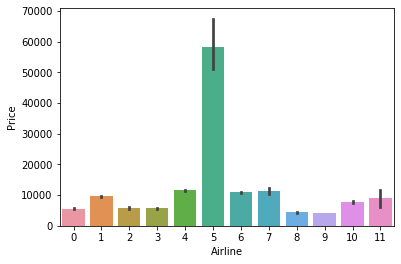

In [54]:
sns.barplot(data['Airline'], data['Price'])

## Source

- there is no much bias

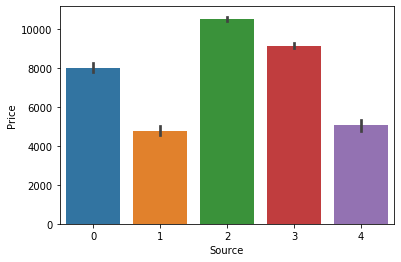

In [55]:
sns.barplot(data['Source'], data['Price'])

## Destination

- there is no much bias

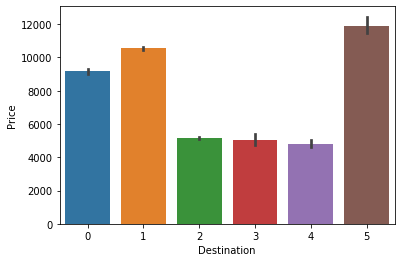

In [56]:
sns.barplot(data['Destination'], data['Price'])

## Additional_Info

- For one type of additional info the price is very high

In [58]:
data['Additional_Info'].value_counts()

8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
2       1
9       1
1       1
Name: Additional_Info, dtype: int64

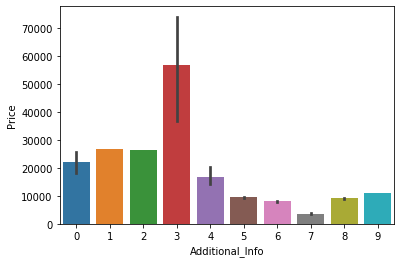

In [59]:
sns.barplot(data['Additional_Info'], data['Price'])

## Route

- Route_1 is same as Source
- We can remove the routes as we have total stops, source and destination

## Dep_Hour

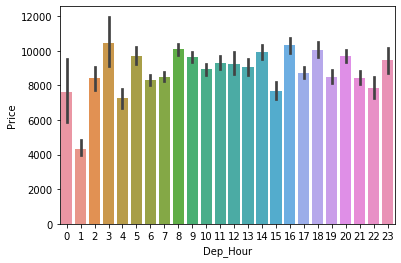

In [63]:
sns.barplot(data['Dep_Hour'], data['Price'])

## Arrival Hours

- No need of using arrival hours and minutes as we have dep_hours, dep_ min and duration

## Total   Stops

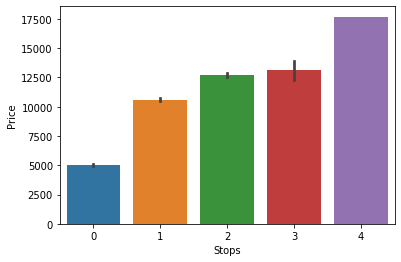

In [64]:
sns.barplot(data['Stops'], data['Price'])

## Feature Selection 

- Drop Route: as we have source, destination and total_stops
- Drop Arrival Hours: as we have departure time and duration
- Drop Arrival Minutes: as we have departure time and duration

In [53]:
data.drop(labels = 'Route_1', axis = 1, inplace = True)
data.drop(labels = 'Route_2', axis = 1, inplace = True)
data.drop(labels = 'Route_3', axis = 1, inplace = True)
data.drop(labels = 'Route_4', axis = 1, inplace = True)
data.drop(labels = 'Route_5', axis = 1, inplace = True)

data.drop(labels = 'Arrival_Hour', axis = 1, inplace = True)
data.drop(labels = 'Arrival_Minute', axis = 1, inplace = True)

## test data
data_test.drop(labels = 'Route_1', axis = 1, inplace = True)
data_test.drop(labels = 'Route_2', axis = 1, inplace = True)
data_test.drop(labels = 'Route_3', axis = 1, inplace = True)
data_test.drop(labels = 'Route_4', axis = 1, inplace = True)
data_test.drop(labels = 'Route_5', axis = 1, inplace = True)

data_test.drop(labels = 'Arrival_Hour', axis = 1, inplace = True)
data_test.drop(labels = 'Arrival_Minute', axis = 1, inplace = True)

In [54]:
data_test.head()

,Airline,Source,Destination,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Duration_hours,Duration_minutes,Stops
0,4,2,1,5,6,06,2019,17,30,10,55,1
1,3,3,0,5,12,05,2019,6,20,4,0,1
2,4,2,1,3,21,05,2019,19,15,23,45,1
3,6,2,1,5,21,05,2019,8,0,13,0,1
4,0,0,2,5,24,06,2019,23,55,2,50,0


In [69]:
X = data.drop('Price', axis=1).copy()
y = data['Price'].copy()   

In [70]:
X.shape

(10682, 12)

In [71]:
y.shape

(10682,)

# Model Selection 

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [73]:
clf_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
              ExtraTreesRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(),
              GaussianNB(), SVR()]

In [74]:
def find_clf(clfs, x, y, k):
    means, stds = [], []
    for clf in clfs:
        try:
            acc = cross_val_score(clf, x, y, cv = k, n_jobs=-1)
            means.append(acc.mean())
            stds.append(acc.std())
            print(clf.__class__.__name__, ': mean = ', acc.mean(), ', std = ', acc.std())
        except:
            means.append(0)
            stds.append(0)
            print(clf.__class__.__name__, ': Not Applicable')
    return means, stds

In [75]:
find_clf(clf_models, X, y, 5)

LinearRegression : mean =  0.4344484879403872 , std =  0.005738116831318995
DecisionTreeRegressor : mean =  0.7808809477702348 , std =  0.018043036341435916


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier : mean =  0.5531872572231828 , std =  0.08755206464297545


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


ExtraTreesClassifier : mean =  0.5485056399342316 , std =  0.07988186275919552
GradientBoostingRegressor : mean =  0.8157040761201537 , std =  0.009852204929070713
KNeighborsRegressor : mean =  0.6184561906530514 , std =  0.014914080844498667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GaussianNB : mean =  0.3694502402554526 , std =  0.053142229604886584
SVR : mean =  -0.02299518556193587 , std =  0.008794834072105021


([0.4344484879403872,
  0.7808809477702348,
  0.5531872572231828,
  0.5485056399342316,
  0.8157040761201537,
  0.6184561906530514,
  0.3694502402554526,
  -0.02299518556193587],
 [0.005738116831318995,
  0.018043036341435916,
  0.08755206464297545,
  0.07988186275919552,
  0.009852204929070713,
  0.014914080844498667,
  0.053142229604886584,
  0.008794834072105021])

# Standard Scaler

### check the accuracy for models after standard scaler

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X_scaled = StandardScaler().fit_transform(X)

In [79]:
find_clf(clf_models, X_scaled, y, 5)

LinearRegression : mean =  0.4344484879403871 , std =  0.005738116831318982
DecisionTreeRegressor : mean =  0.8092140352554423 , std =  0.022081684539520436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier : mean =  0.5532009655444146 , std =  0.08062635632689433


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


ExtraTreesClassifier : mean =  0.543442006640572 , std =  0.0797254074471062
GradientBoostingRegressor : mean =  0.8152951762345818 , std =  0.00938802550526279
KNeighborsRegressor : mean =  0.7589929512338247 , std =  0.011621460435112273


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GaussianNB : mean =  0.3637241016836323 , std =  0.052084176470938236
SVR : mean =  0.04269005796716343 , std =  0.009915175146971624


([0.4344484879403871,
  0.8092140352554423,
  0.5532009655444146,
  0.543442006640572,
  0.8152951762345818,
  0.7589929512338247,
  0.3637241016836323,
  0.04269005796716343],
 [0.005738116831318982,
  0.022081684539520436,
  0.08062635632689433,
  0.0797254074471062,
  0.00938802550526279,
  0.011621460435112273,
  0.052084176470938236,
  0.009915175146971624])

# Hyper parameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV

## DecisionTreeRegressor

In [158]:
dt_params = {'max_features':[1, 3, 6, 9],
             'min_samples_split':[2, 6, 10],
             'min_samples_leaf':[1, 3, 6, 9]}

In [159]:
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, n_jobs=-1)
dt_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [1, 3, 6, 9],
                         'min_samples_leaf': [1, 3, 6, 9],
                         'min_samples_split': [2, 6, 10]},
             pre_dispatch='2*n_jobs'

## Gradient Tree Boosting

In [81]:
gt_params = {'learning_rate':[0.001,0.05,0.1],
             'min_samples_split':[2, 6],
             'min_samples_leaf':[3, 6],
             'n_estimators': [100, 300,],
             'max_depth':[4,8]}

In [82]:
gt_grid = GridSearchCV(GradientBoostingRegressor(), gt_params, n_jobs=-1)
gt_grid.fit(X_scaled, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...
                             

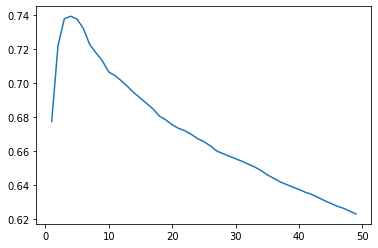

In [162]:
knn_acc = []
for k in range(1,50):
    acc = cross_val_score(KNeighborsRegressor(k), X_scaled, y, cv= 3,n_jobs=-1)
    knn_acc.append(acc.mean())
plt.plot(range(1,50), knn_acc)

In [163]:
knn_acc

[0.6774799845687828,
 0.7220667803293012,
 0.7378748500580214,
 0.7393615906319893,
 0.7377054060079885,
 0.732186564772369,
 0.7227282485272538,
 0.7178146886025889,
 0.7130972435300027,
 0.7065939185935622,
 0.7044231664230877,
 0.7014127100979071,
 0.6979457137365065,
 0.694291652540584,
 0.6911888209882777,
 0.688028193495211,
 0.6848129087123981,
 0.6806370687016235,
 0.6784048271426713,
 0.6756189519182015,
 0.6734662123842851,
 0.6720765194563422,
 0.6699646467684698,
 0.6674898989048857,
 0.6656406918696387,
 0.6632534841048998,
 0.6602410275587819,
 0.6586292833721236,
 0.65713923396446,
 0.6556032296745489,
 0.654147802707031,
 0.6524625488450169,
 0.6507798169754799,
 0.6487132739567143,
 0.6461296468836562,
 0.6441654194512249,
 0.6420485115475892,
 0.6405218119216183,
 0.6389689847585406,
 0.6375283212706054,
 0.635941576661485,
 0.6346545611535946,
 0.6328621355353782,
 0.6310468402057413,
 0.6294097733871434,
 0.627769106183321,
 0.6265088241965854,
 0.6248589677735826,


K 1
accuracy  0.6774799845687828
K 2
accuracy  0.7220667803293012
K 3
accuracy  0.7378748500580214
K 4
accuracy  0.7393615906319893
K 5
accuracy  0.7377054060079885
K 6
accuracy  0.732186564772369
K 7
accuracy  0.7227282485272538
K 8
accuracy  0.7178146886025889
K 9
accuracy  0.7130972435300027
K 10
accuracy  0.7065939185935622
K 11
accuracy  0.7044231664230877
K 12
accuracy  0.7014127100979071
K 13
accuracy  0.6979457137365065
K 14
accuracy  0.694291652540584
K 15
accuracy  0.6911888209882777
K 16
accuracy  0.688028193495211
K 17
accuracy  0.6848129087123981
K 18
accuracy  0.6806370687016235
K 19
accuracy  0.6784048271426713
K 20
accuracy  0.6756189519182015
K 21
accuracy  0.6734662123842851
K 22
accuracy  0.6720765194563422
K 23
accuracy  0.6699646467684698
K 24
accuracy  0.6674898989048857
K 25
accuracy  0.6656406918696387
K 26
accuracy  0.6632534841048998
K 27
accuracy  0.6602410275587819
K 28
accuracy  0.6586292833721236
K 29
accuracy  0.65713923396446
K 30
accuracy  0.65560322967

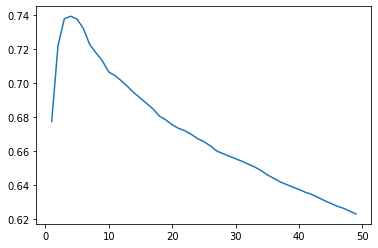

In [164]:
knn_acc = []
for k in range(1,50):
    acc = cross_val_score(KNeighborsRegressor(k), X_scaled, y, cv= 3,n_jobs=-1)
    knn_acc.append(acc.mean())
    print('K',k)
    print('accuracy ',acc.mean())
plt.plot(range(1,50), knn_acc)

## Best Features

In [165]:
dt_grid.best_score_

0.8174271889970557

In [166]:
gt_grid.best_score_

0.8775900718924933

In [167]:
dt_grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [168]:
gt_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
gt_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#  Ensembling

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [171]:
dt = dt_grid.best_estimator_

In [88]:
gt = gt_grid.best_estimator_

In [172]:
prediction = pd.DataFrame(np.zeros((len(y_test), 2)), columns = 'dt gt'.split())

In [173]:
dt.fit(X_train, y_train)
prediction['dt'] = dt.predict(X_test)
gt.fit(X_train, y_train)
prediction['gt'] = gt.predict(X_test)

In [174]:
prediction.corr()

,dt,gt
dt,1.000000,0.945382
gt,0.945382,1.000000


## final model - GT

In [175]:
y_pred = gt.predict(X_test)

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_error, r2_score

In [177]:
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_absolute_error(y_test,y_pred)))

MAE:  665.9694011616579
MSE:  1406598.8736434253
RMSE:  25.8063829538674


In [178]:
r2_score(y_test,y_pred)

0.9247052573634452

# Test data

In [84]:
X_test = data_test.copy()  

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
X_test_scaled = StandardScaler().fit_transform(X_test)

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gb_reg = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
y_test_pred = gt.predict(X_test_scaled)

In [90]:
y_test_pred

array([14360.64333018,  4126.13737265, 12714.98264647, ...,
       16335.47855746, 11655.30408831,  7705.64213174])

In [93]:
pd.DataFrame(y_test_pred).to_csv('price_predicted.csv', index = False)

## Conclusion

- Using Gradient Boosting Algorithm, we are predicting the flight price
- 92% accuracy with test data